# Machine Learning Analysis - London Housing Data

This notebook will apply supervised ML models from scikit-learn to analyse the real estate data in ```10m_london_houses_.csv```.

Exploratory data analysis of this dataset is covered in ```EDA.ipynb```.

The goal of this notebook is to try out some simple ML models and test best ML practices using a straightforward dataset. This includes
- Apply regression models (Linear, Logistic, Ridge and Lasso) to predict house prices.
- Apply KNN to predict whether or not a house has a garage/ garden.
- Perform k-fold cross validation.
- Evaluate model performance with all available metrics: ROC/ AUC curves, accuracy, precision, F1-score, R^2, MSE, RMSE, NMSE confusion matrices.
- Perform hyperparameter tuning with GridSearchCV and RandomSearchCV to optimize models.
- Determine the best regression model for price prediction.
- Convert categorical data to numerical data.
- Evaluate the effect of scaling/ normalization on model performance.
- Automate model building with pipelines.

In [2]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

print(np.NaN)

nan


In [3]:
# Load the data
housing_df = pd.read_csv('data/10m_london_houses_.csv')

# Reminder of how the data looks
print(f"Dataset shape: {housing_df.shape}")
display(housing_df.head())

Dataset shape: (1000, 17)


,Address,Neighborhood,Bedrooms,Bathrooms,Square Meters,Building Age,Garden,Garage,Floors,Property Type,Heating Type,Balcony,Interior Style,View,Materials,Building Status,Price (£)
0,78 Regent Street,Notting Hill,2,3,179,72,No,No,3,Semi-Detached,Electric Heating,High-level Balcony,Industrial,Garden,Marble,Renovated,2291200
1,198 Oxford Street,Westminster,2,1,123,34,Yes,No,1,Apartment,Central Heating,High-level Balcony,Industrial,City,Laminate Flooring,Old,1476000
2,18 Regent Street,Soho,5,3,168,38,No,Yes,3,Semi-Detached,Central Heating,No Balcony,Industrial,Street,Wood,Renovated,1881600
3,39 Piccadilly Circus,Islington,5,1,237,53,Yes,Yes,1,Apartment,Underfloor Heating,No Balcony,Classic,Park,Granite,Renovated,1896000
4,116 Fleet Street,Marylebone,4,1,127,23,No,Yes,2,Semi-Detached,Central Heating,No Balcony,Modern,Park,Wood,Old,1524000


In [5]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [7]:
# Test a KNN model
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 5)

In [ ]:
# First we need to prep the data a bit

# Create column where Garage is 0 or 1 instead of Yes/ No
housing_df['Garage_val'] = housing_df['Garage'].replace({"No": 0, "Yes": 1})

# Test the KNN with just a few columns first
X = housing_df[['Bedrooms', 'Square Meters', 'Building Age']].values
y = housing_df['Garage_val'].values

# Perform test-train split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=55, stratify=y)

# Check the size of our new datasets
datasets = [X_train, X_test, y_train, y_test]
for set in datasets:
    print(set.shape)

(700, 3)
(300, 3)
(700,)
(300,)


In [33]:
# Test the model on the data
knn.fit(X_train, y_train)

knn.predict(X_test)

knn.score(X_test, y_test)

0.49333333333333335

Quite terrible performance - basically random chance!

In [34]:
# Loop over multiple neighbor values to find the optimal value
train_accuracies = {}
test_accuracies = {}
neighbors = np.arange(1, 20)
for n in neighbors:
    knn = KNeighborsClassifier(n_neighbors = n)
    knn.fit(X_train, y_train)
    train_accuracies[n] = knn.score(X_train, y_train)
    test_accuracies[n] = knn.score(X_test, y_test)

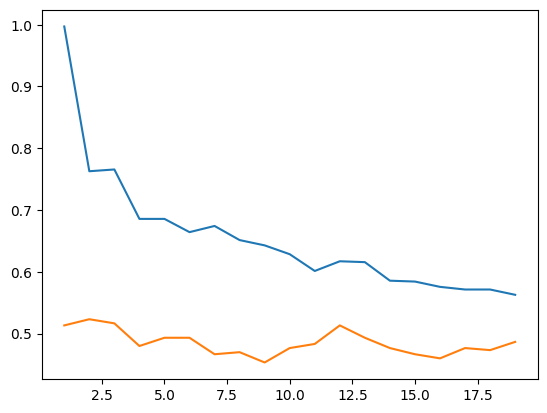

In [39]:
# Plot the KNN scores
plt.plot(neighbors, train_accuracies.values())
plt.plot(neighbors, test_accuracies.values())
plt.show()


Tragically, the KNN doesn't get much better than random chance